## Visualising Births & Deaths at Vienna Hospital in the 1840s
annual_deaths_by_clinic.csv - 'Clinic 1' was staffed by all-male doctors, 'Clinic 2' was staffed by female midwives.
#### From the perspective of Dr Semmelweis, a Physician working at the hospital attempting to figure out why so many women in maternity wards were dying from childbed fever(puerperal fever)

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Data Exploration & Cleaning

In [5]:
clinics = pd.read_csv('annual_deaths_by_clinic.csv')
deaths = pd.read_csv('monthly_deaths.csv')

In [8]:
clinics.sample()

,year,births,deaths,clinic
11,1846,3754,105,clinic 2


In [7]:
clinics.dtypes

year       int64
births     int64
deaths     int64
clinic    object
dtype: object

In [12]:
deaths.sample()

,date,births,deaths
63,1846-05-01,305,41


In [10]:
deaths.dtypes

date      object
births     int64
deaths     int64
dtype: object

In [13]:
deaths.date = pd.to_datetime(deaths.date)

In [14]:
deaths.dtypes

date      datetime64[ns]
births             int64
deaths             int64
dtype: object

In [23]:
clinic1 = clinics[clinics.clinic == 'clinic 1']
clinic2 = clinics[clinics.clinic == 'clinic 2']

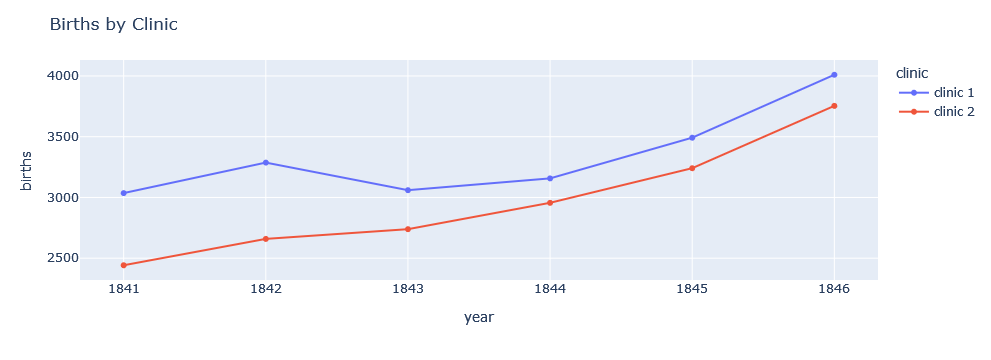

In [48]:
fig = px.line(clinics,
        x='year',
        y='births',
        color='clinic',
        markers=True
       )
fig.update_layout(
    title='Births by Clinic'
)

- Clinic 1 is bigger/busier going by the number of births per year
- There was a drop in the number of patients/births between the year 1842 and 1843 before a steady rise in the number of patients for both clinics

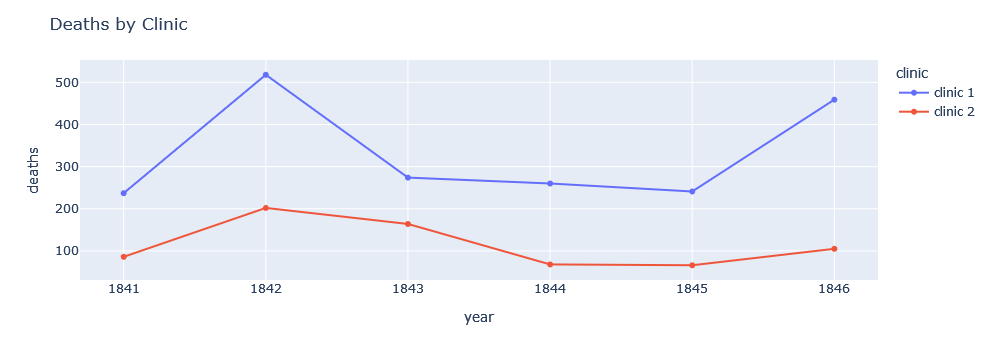

In [49]:
fig = px.line(clinics,
        x='year',
        y='deaths',
        color='clinic',
        markers=True
       )
fig.update_layout(
    title='Deaths by Clinic'
)

- The number of deaths in both clinics increased in the years 1841-1842, with 1842 being the year with the highest reported deaths for both clinics
- Between 1842 and 1845 there was a decrease year-on-year in the number of deaths reported for both clinics.
- Between 1845 and 1846 there was a small rise in the number of deaths reported at clinic 2, but a large spike reported in clinic 1.

In [61]:
clinics['pct_deaths'] = clinics.deaths / clinics.births

In [64]:
clinic_1 = clinics[clinics.clinic == 'clinic 1']

In [66]:
clinic_1_avg  = (clinic_1.deaths.sum() / clinic_1.births.sum()) * 100

In [67]:
clinic_1_avg

9.924159265542361

In [65]:
clinic_2 = clinics[clinics.clinic == 'clinic 2']

In [68]:
clinic_2_avg  = (clinic_2.deaths.sum() / clinic_2.births.sum()) * 100

In [69]:
clinic_2_avg

3.8839862852003826

- During the entire period clinic 1 had about 3x the rate of deaths at 9.92% compared to clinic 2 with 3.88%

- For context: In June 1847 Dr Semmelweis ordered everyone on his medical staff to start cleaning their hands and instruments with chlorine solution

In [71]:
deaths['pct_deaths'] = deaths.deaths / deaths.births

In [72]:
deaths.sample()

,date,births,deaths,pct_deaths
21,1842-11-01,209,48,0.229665


In [157]:
handwashing_start = 'June 1847'

In [158]:
before = deaths[deaths.date < handwashing_start]

In [170]:
after = deaths[deaths.date >= handwashing_start]

In [171]:
before_avg = before.deaths.sum() / before.births.sum() * 100

In [172]:
before_avg

10.41383134230556

In [173]:
after_avg = (after.deaths.sum() / after.births.sum()) * 100

In [174]:
after_avg

2.1531463229719483

In [175]:
before_6ma = before.set_index('date')

In [176]:
before_6ma= before_6ma.rolling(window=6).mean()

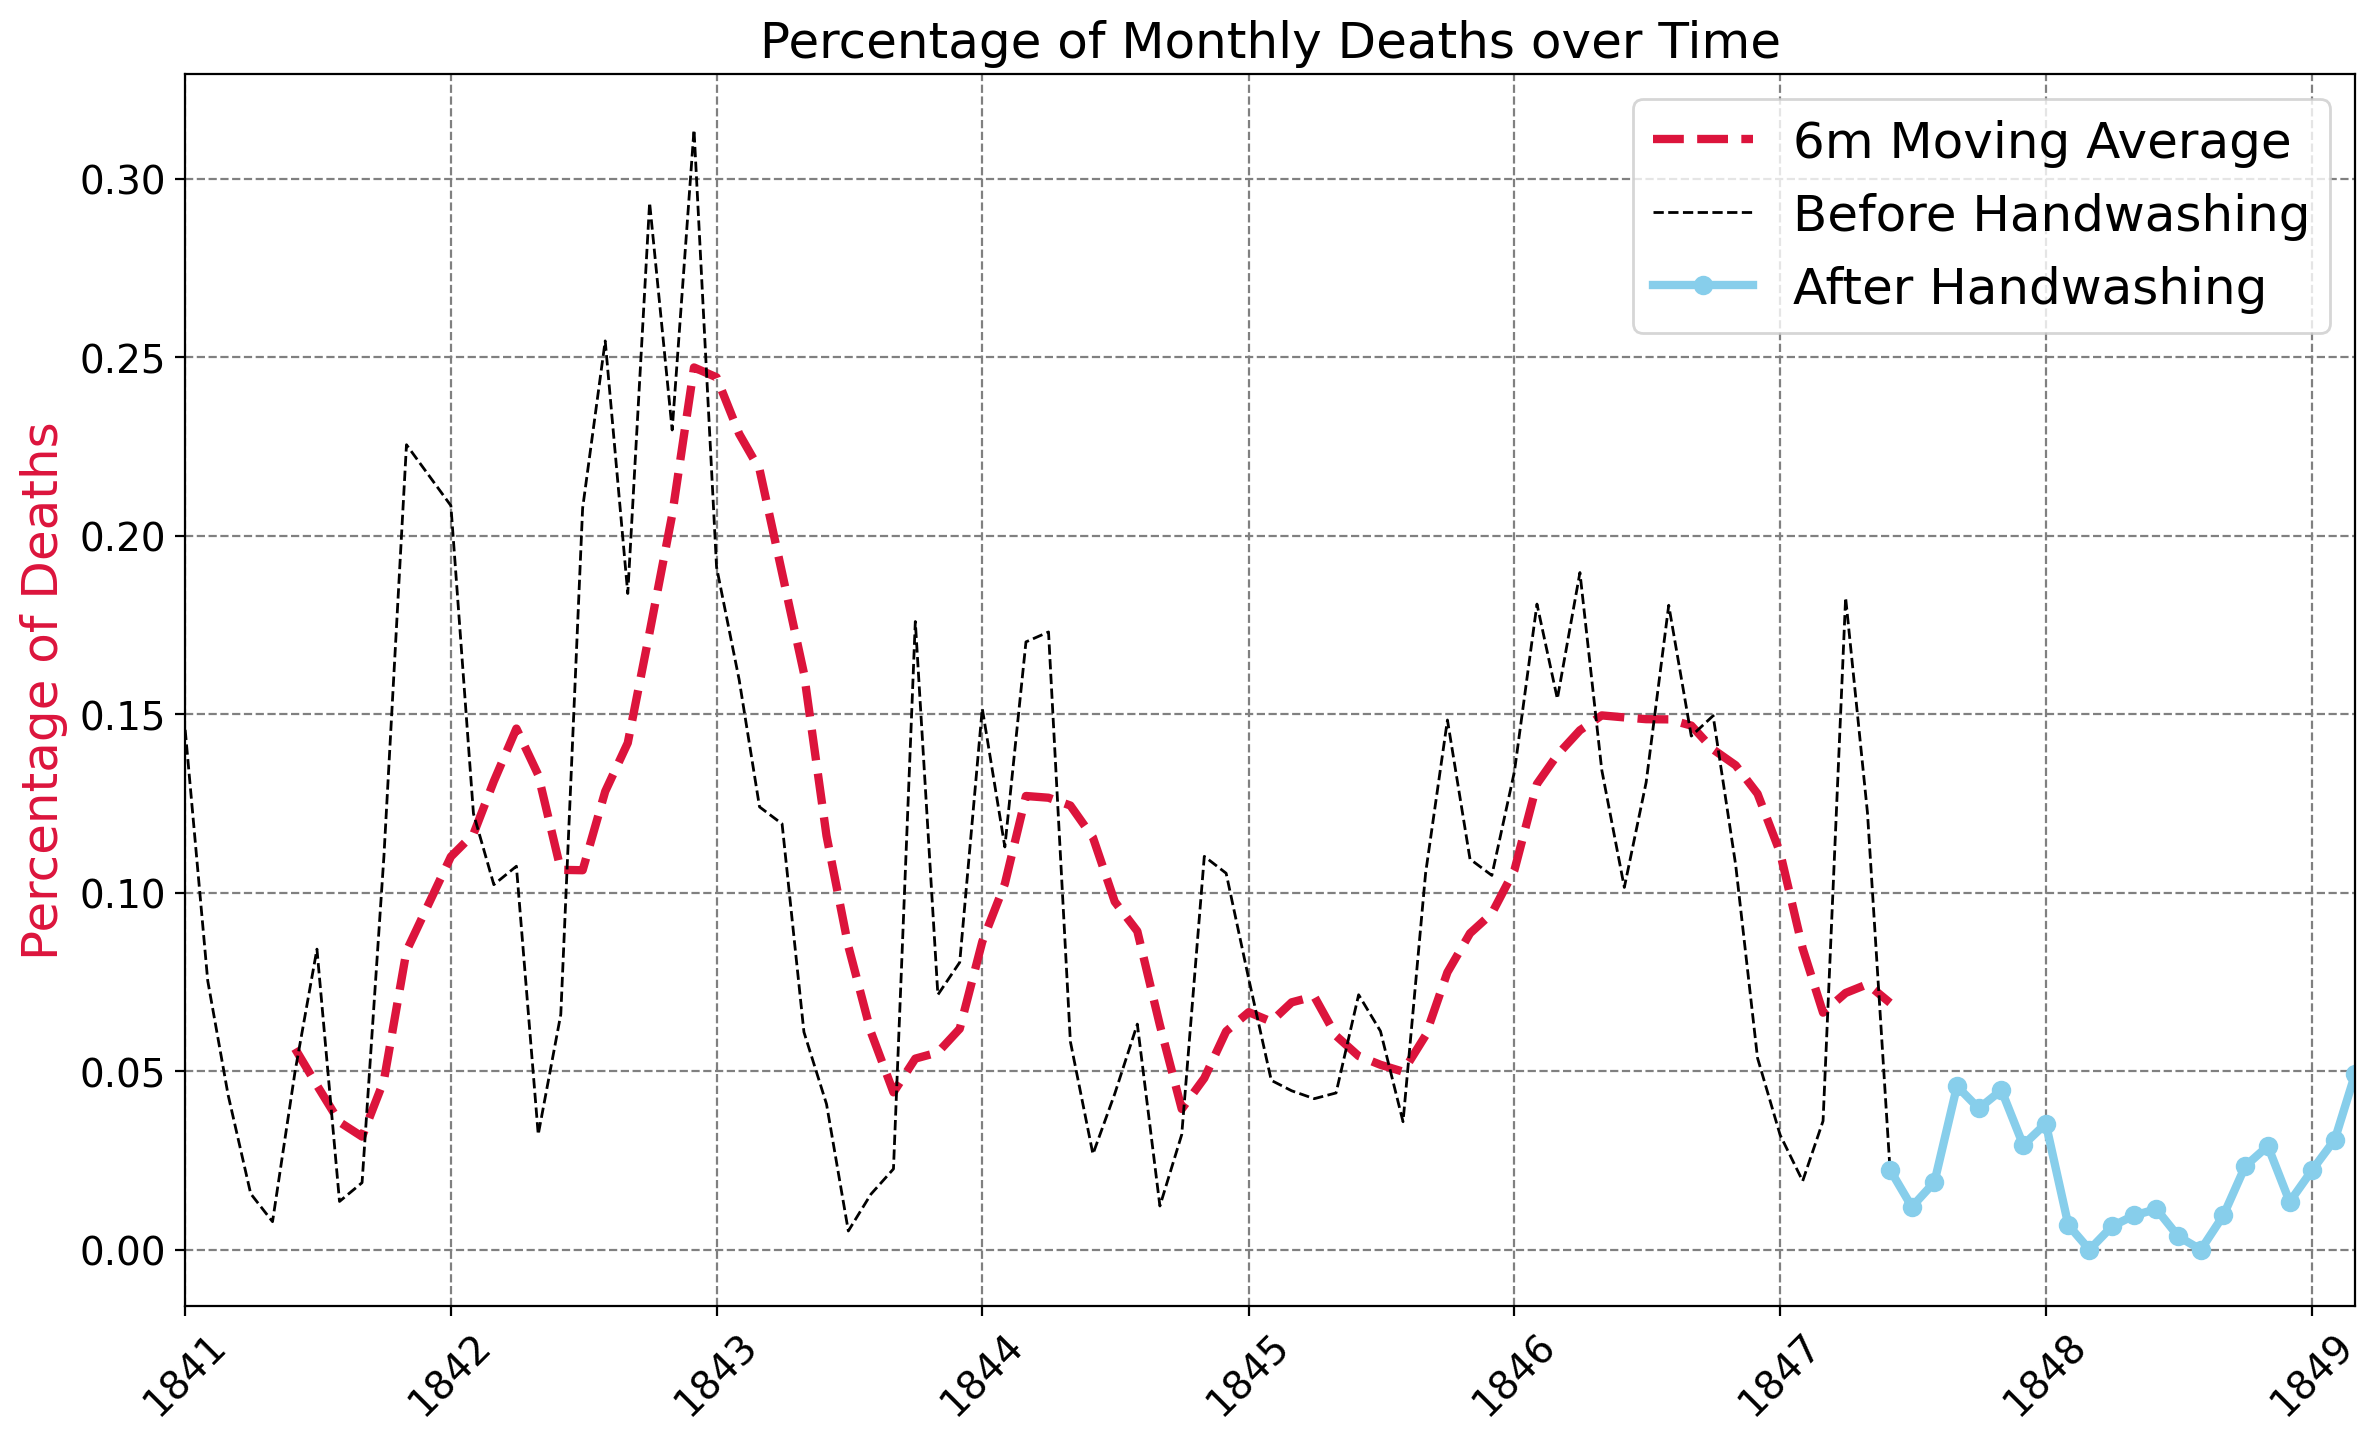

In [177]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
 
ax = plt.gca()

ax.set_xlim([deaths.date.min(), deaths.date.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(before_6ma.index, 
                    before_6ma.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before.date, 
                    before.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(after.date, 
                    after.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
 
plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)

- We can see that after the implementation of the handwashing procedures, the average death rate fell from about 10.41% to 2.15%
- There is also a visible trend of a dropping 6-month moving average visible.

## Exploratory questions
- What was the average percentage of monthly deaths before handwashing (i.e., before June 1847)?
- What was the average percentage of monthly deaths after handwashing was made obligatory?
- By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
- How many times lower are the chances of dying after handwashing compared to before?

In [180]:
avg_pct_monthly_before = before.pct_deaths.mean() * 100
avg_pct_monthly_before

10.397645114275548

In [184]:
avg_pct_monthly_after = after.pct_deaths.mean() * 100
avg_pct_monthly_after

2.1093375097254534

In [187]:
difference_percentage = avg_pct_monthly_before - avg_pct_monthly_after
difference_percentage

8.288307604550095

In [189]:
magnitude = avg_pct_monthly_before / avg_pct_monthly_after
magnitude

4.92934159011323

- The average percentage of deaths before handwashing was about 10.4%
- The average percentage of deaths after handwashing was about 2.10%
- Handwashing appears to have reduced the average chance of dying during childbirth by about 8.3%
- This represents an almost 5x improvement 

In [190]:
deaths['washing_hands'] = np.where(deaths.date < handwashing_start, 'No', 'Yes')

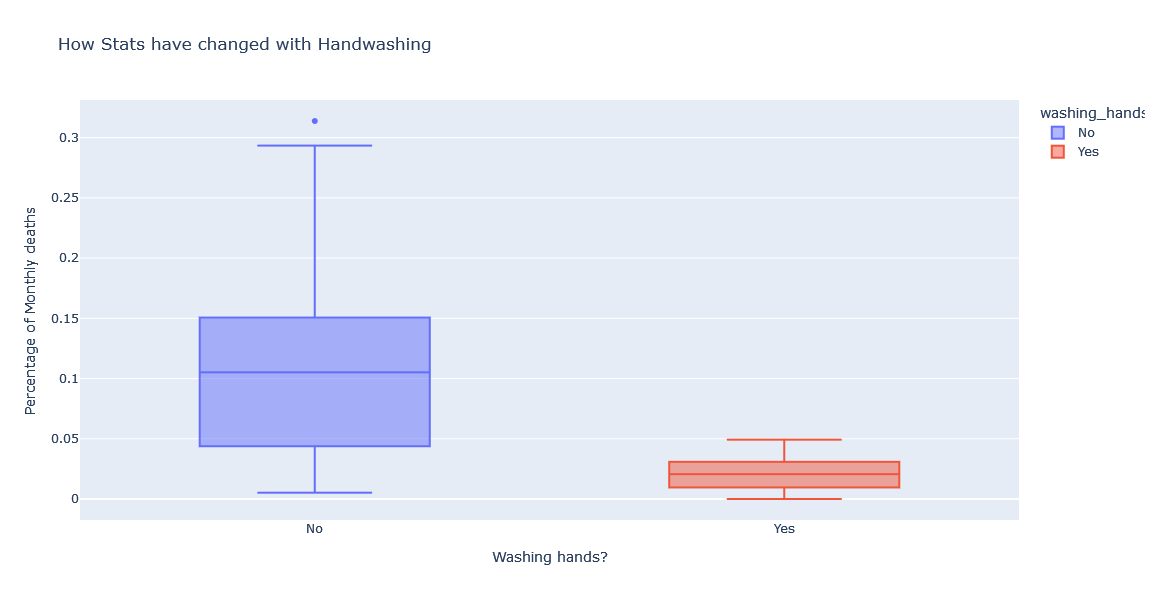

In [197]:
box = px.box(
    deaths,
    x='washing_hands',
    y='pct_deaths',
    color='washing_hands',
    title ='How Stats have changed with Handwashing',
    height=600,
    width=600
)
box.update_layout(xaxis_title='Washing hands?',
                 yaxis_title='Percentage of Monthly deaths')

- We can see that the implementation of handwashing not only reduced the rate of deaths, but also reduced the overall range of deaths, as shown by the reduced q3, median and q1 figures.